In [7]:
import kagglehub

# Loading latest version data
path = kagglehub.dataset_download("nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone


# Imports and Setup

In [8]:
# ========================
# 1. Import and Setup Required modules
# ========================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings("ignore")
print("Modules loaded.")


Modules loaded.


# Load Image Paths and Labels into a DataFrame

In [12]:
# ===================================
# 2. Load Image Paths and Labels
# ===================================

data_dir = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

filepaths = []
labels = []

for folder in os.listdir(data_dir):
    class_folder = os.path.join(data_dir, folder)
    for filename in os.listdir(class_folder):
        filepaths.append(os.path.join(class_folder, filename))
        labels.append(folder)

df = pd.DataFrame({'filepath': filepaths, 'label': labels})
print("Dataset loaded with shape:", df.shape)


Dataset loaded with shape: (12446, 2)


# Basic Exploratory Data Analysis (EDA)

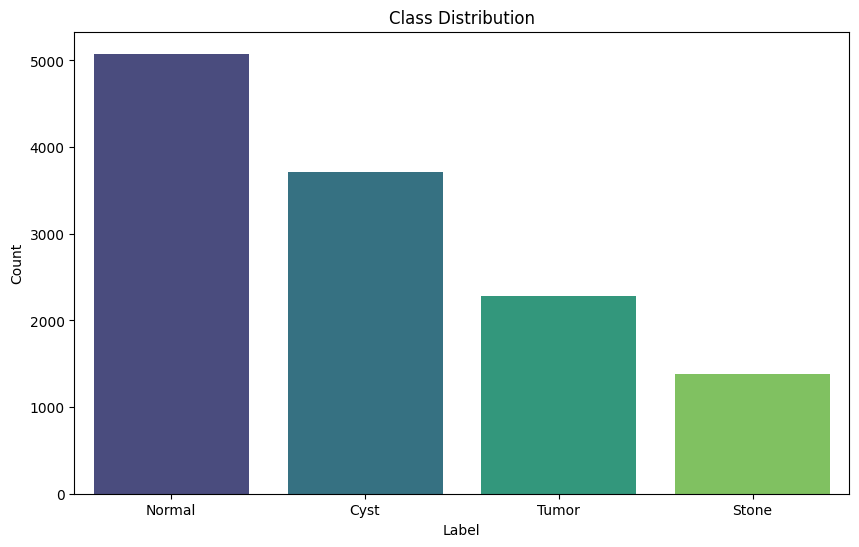

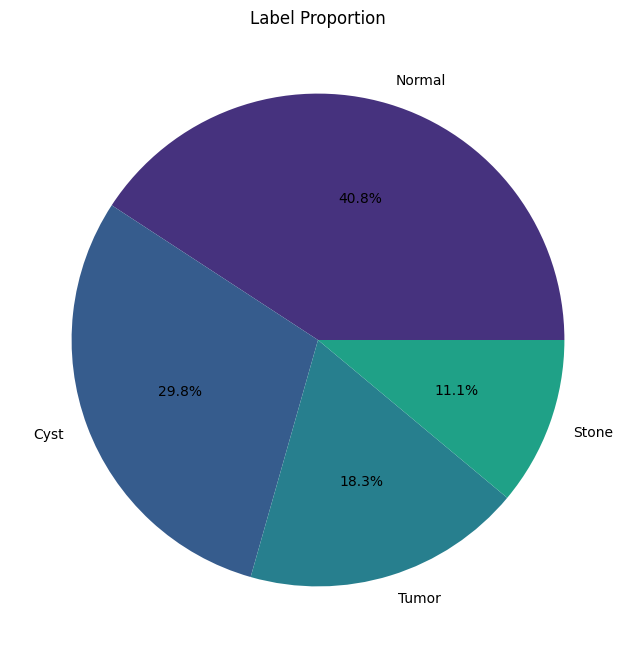

Duplicate filepaths: 0


In [13]:
# ========================
# 3. Basic EDA
# ========================

# Plot class distribution bar chart
label_counts = df['label'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Plot class distribution pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Label Proportion')
plt.show()

# Check for duplicate filepaths
print("Duplicate filepaths:", df['filepath'].duplicated().sum())


# Image Shape Consistency Check

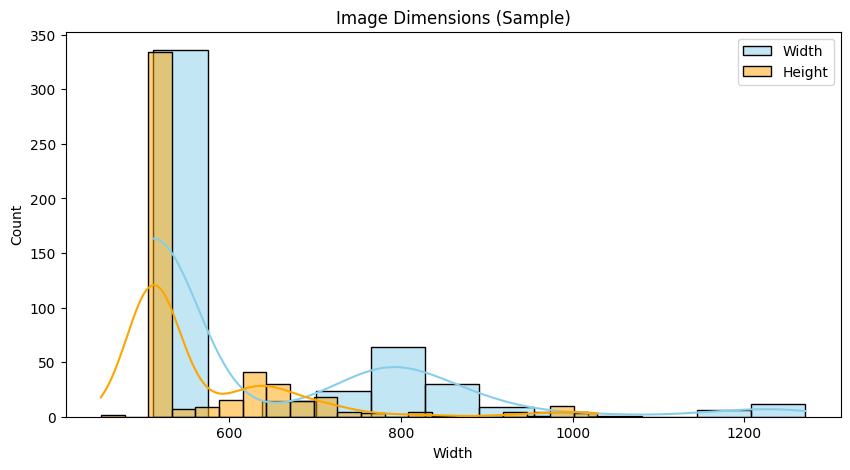

Corrupt images found: 0


In [16]:
# ===============================
# 4. Image Shape Consistency
# ===============================

shapes = []
corrupt = 0

# Sample 500 images to check sizes
for path in df['filepath'].sample(500):
    try:
        with Image.open(path) as img:
            shapes.append(img.size)
    except:
        corrupt += 1

shape_df = pd.DataFrame(shapes, columns=['Width', 'Height'])

# Plot histograms for width and height
plt.figure(figsize=(10, 5))
sns.histplot(shape_df['Width'], color='skyblue', label='Width', kde=True)
sns.histplot(shape_df['Height'], color='orange', label='Height', kde=True)
plt.legend()
plt.title("Image Dimensions (Sample)")
plt.show()

print("Corrupt images found:", corrupt)


# Train-Validation-Test Split

In [20]:
# ====================================
# 5. Train, Validation, Test Split
# ====================================

train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

print("Train size:", train_df.shape)
print("Validation size:", valid_df.shape)
print("Test size:", test_df.shape)

# Confirm label balance across splits
for split_name, split_df in zip(["Train", "Validation", "Test"], [train_df, valid_df, test_df]):
    print(f"\n{split_name} split distribution:\n", split_df['label'].value_counts(normalize=True))


Train size: (8712, 2)
Validation size: (1867, 2)
Test size: (1867, 2)

Train split distribution:
 label
Normal    0.407943
Cyst      0.297980
Tumor     0.183425
Stone     0.110652
Name: proportion, dtype: float64

Validation split distribution:
 label
Normal    0.408141
Cyst      0.297804
Tumor     0.183717
Stone     0.110337
Name: proportion, dtype: float64

Test split distribution:
 label
Normal    0.407606
Cyst      0.298340
Tumor     0.183182
Stone     0.110873
Name: proportion, dtype: float64


# Plot Label Distributions for Splits

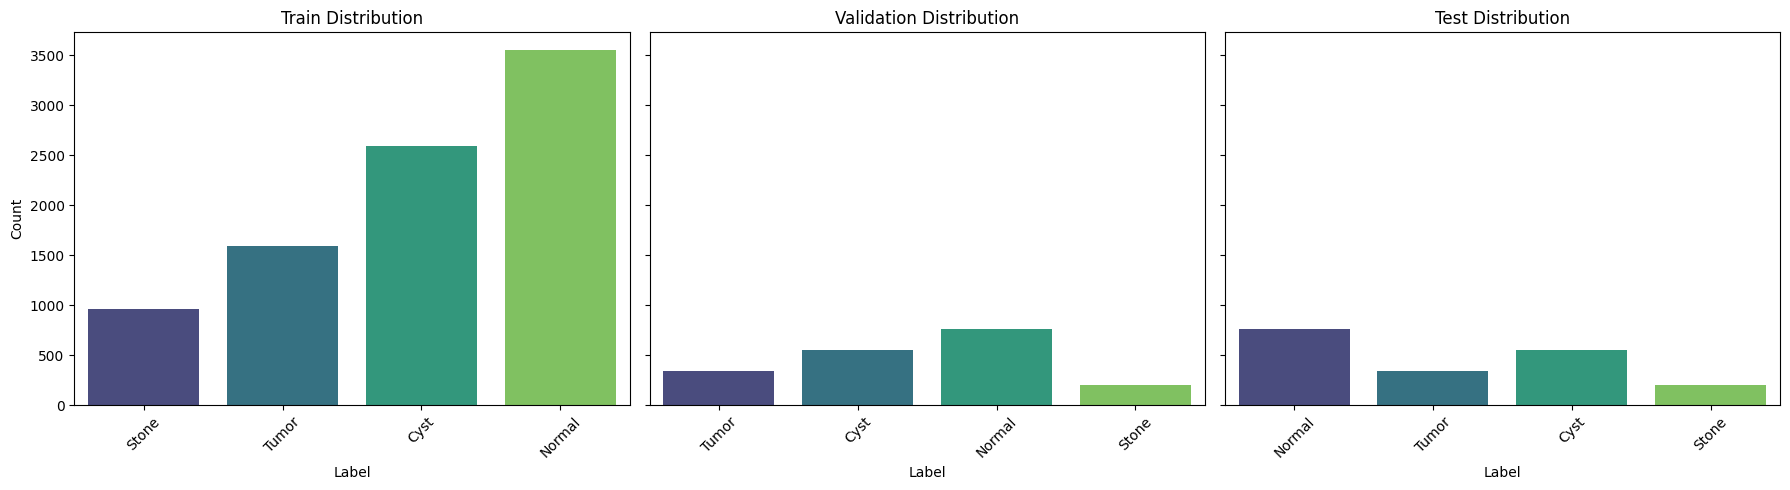

In [21]:
# ==============================
# 6. Label Distribution Plots
# ==============================

def plot_split_distributions(train, valid, test):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    for ax, df_split, name in zip(axes, [train, valid, test], ["Train", "Validation", "Test"]):
        sns.countplot(data=df_split, x='label', ax=ax, palette='viridis')
        ax.set_title(f'{name} Distribution')
        ax.set_xlabel('Label')
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()
    plt.show()

plot_split_distributions(train_df, valid_df, test_df)


# Image Orientation and Aspect Ratio Analysis

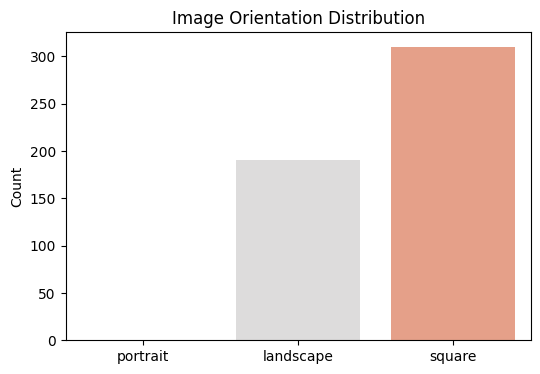

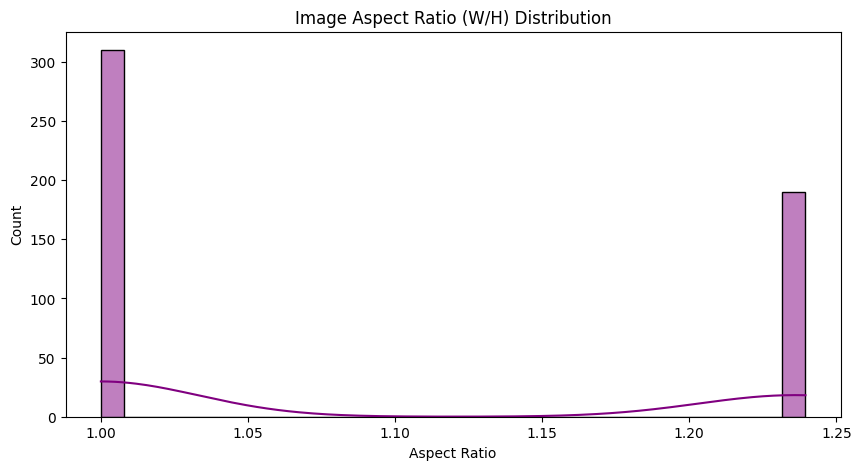

In [19]:
# ======================================
# 7. Image Aspect Ratio and Orientation
# ======================================

aspect_ratios = []
orientations = {"portrait": 0, "landscape": 0, "square": 0}

for path in df['filepath'].sample(500):
    try:
        img = Image.open(path)
        w, h = img.size
        aspect_ratios.append(w / h)
        if w > h:
            orientations['landscape'] += 1
        elif h > w:
            orientations['portrait'] += 1
        else:
            orientations['square'] += 1
    except:
        continue

# Plot image orientation counts
plt.figure(figsize=(6, 4))
sns.barplot(x=list(orientations.keys()), y=list(orientations.values()), palette='coolwarm')
plt.title("Image Orientation Distribution")
plt.ylabel("Count")
plt.show()

# Plot aspect ratio histogram
plt.figure(figsize=(10, 5))
sns.histplot(aspect_ratios, bins=30, kde=True, color='purple')
plt.title("Image Aspect Ratio (W/H) Distribution")
plt.xlabel("Aspect Ratio")
plt.show()


# File Size Analysis

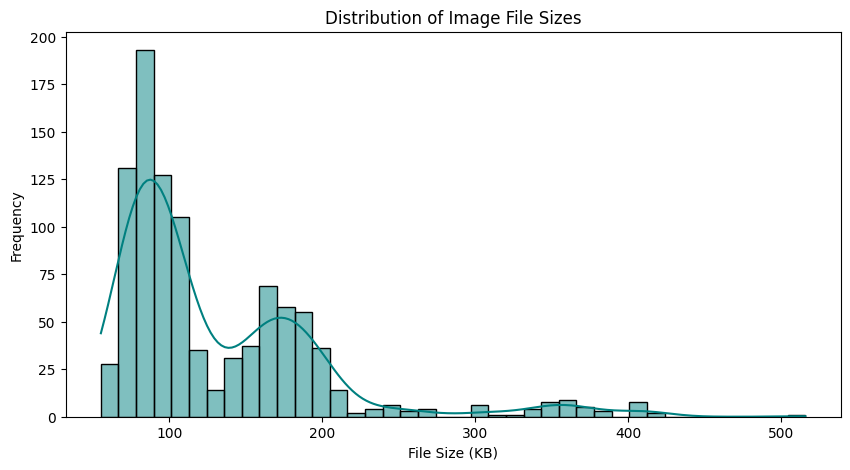

Mean file size: 131.00 KB
Max file size: 515.95 KB
Min file size: 55.36 KB


In [ ]:
# =======================
# 8. Analyzing the File Sizes of Images
# =======================

file_sizes_kb = [os.path.getsize(p) / 1024 for p in df['filepath'].sample(1000)]

plt.figure(figsize=(10, 5))
sns.histplot(file_sizes_kb, bins=40, kde=True, color='teal')
plt.title("Distribution of Image File Sizes")
plt.xlabel("File Size (KB)")
plt.ylabel("Frequency")
plt.show()

print(f"Mean file size: {np.mean(file_sizes_kb):.2f} KB")
print(f"Max file size: {np.max(file_sizes_kb):.2f} KB")
print(f"Min file size: {np.min(file_sizes_kb):.2f} KB")
